In [2]:
# загрузка необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
import shutil

In [2]:
# загрузка csv-файла с ссылками на изображения в датафрейм
df = pd.read_csv('train.csv', index_col = 0)

In [5]:
df.head()

,image_path,emotion
0,./train/anger/0.jpg,anger
1,./train/anger/1.jpg,anger
2,./train/anger/10.jpg,anger
3,./train/anger/100.jpg,anger
4,./train/anger/1000.jpg,anger


In [6]:
# распределение изображений по эмоциям
df.emotion.value_counts()

anger        7022
neutral      6795
sad          6740
surprise     6323
happy        5955
uncertain    5927
fear         5044
disgust      3155
contempt     3085
Name: emotion, dtype: int64

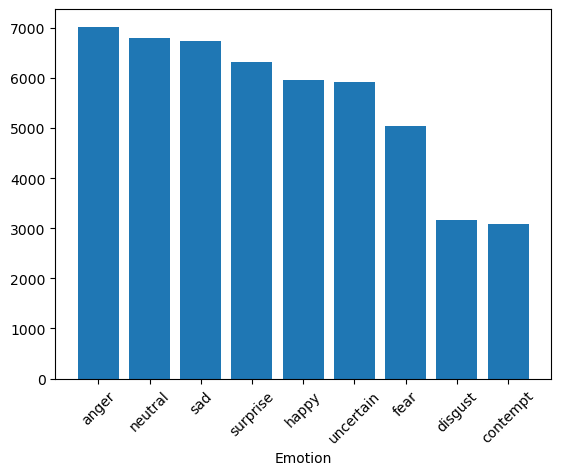

In [7]:
_ = plt.bar(df.emotion.value_counts().index, height=df.emotion.value_counts())
_ = plt.xticks(rotation=45)
_ = plt.xlabel('Emotion')

In [8]:
# создание словаря эмоций
emotion_mapping = {i : char for i,char in enumerate(df.emotion.unique())}
emotion_mapping

{0: 'anger',
 1: 'contempt',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprise',
 8: 'uncertain'}

In [3]:
# создание списка для создания словаря цветов
bgr_list = []
for col in mcolors.TABLEAU_COLORS.values():
    r, g, b  = mcolors.to_rgb(col) 
    bgr_list.append([int(b*255), int(g*255), int(r*255)])
    bgr_list = bgr_list[:9]

# создание словаря цветов для выделения эмоций 
BGR_dict = {key : bgr_list[i] for i, key in enumerate(df.emotion.unique())}
BGR_dict

{'anger': [180, 119, 31],
 'contempt': [14, 127, 255],
 'disgust': [44, 160, 44],
 'fear': [40, 39, 214],
 'happy': [189, 103, 148],
 'neutral': [75, 86, 140],
 'sad': [194, 119, 227],
 'surprise': [127, 127, 127],
 'uncertain': [34, 189, 188]}

In [9]:
# запись файлов словарей эмоций и их цветов
def save_dict_to_file(dic, path):
    f = open(path,'w')
    f.write(str(dic))
    f.close()

save_dict_to_file(emotion_mapping, 'dict.txt')
save_dict_to_file(BGR_dict, 'BGR_dict.txt')

In [ ]:
# разделение датафрейма на обучающую и валидационную части
train_df = df.sample(frac=0.8,random_state=200)
test_df = df.drop(train_df.index)

In [ ]:
# запись частей в csv-файлы
train_df.to_csv('train_df.csv') 
test_df.to_csv('test_df.csv')

In [11]:
# создание списка для структруированного по заданию итогового csv-файла 
list_1 = glob.glob('test_kaggle/?.jpg')
list_2 = glob.glob('test_kaggle/??.jpg')
list_3 = glob.glob('test_kaggle/???.jpg')
list_4 = glob.glob('test_kaggle/????.jpg')
list_1.sort()
list_2.sort()
list_3.sort()
list_4.sort()
my_list = list_1 + list_2 + list_3 + list_4

In [12]:
# запись списка в файл
def save_list_to_file(lst, path):
    f = open(path,'w')
    f.write(str(lst))
    f.close()

save_list_to_file(my_list, 'test_list.txt')

In [3]:
# распаковка архива с изображениями для обучения
shutil.unpack_archive('train.zip')

In [4]:
# распаковка архива с изображениями для теста
shutil.unpack_archive('test_kaggle.zip')